In [1]:
!ls *pval*

hidra pval thresh.ipynb  normed_logfc.pval_0.01.tsv  normed_logfc.pval_0.05.tsv


In [2]:
import pandas
d = pandas.read_table("normed_logfc.pval_0.01.tsv")
d.head()

,FragmentGroupPosition_NumUniqFragments,baseMean,log2FoldChange,lfcMLE,lfcSE,stat,pvalue,padj
0,chr6:146669308-146669674_4,15.673285,0.907571,1.030298,0.268445,3.380844,0.000723,0.033423
1,chr6:128161577-128161932_1,5.087493,-1.563646,-2.389073,0.387013,-4.040288,0.000053,0.004326
2,chr2:57101062-57101399_1,2.744695,1.093246,2.012632,0.412046,2.653211,0.007973,0.166545
3,chr3:151941719-151942111_3,19.820421,-0.714260,-0.789759,0.244228,-2.924564,0.003449,0.099127
4,chr17:65486257-65486656_2,2.165659,-1.501191,-4.353771,0.414621,-3.620631,0.000294,0.016918


In [3]:
from HiDRA_hidata import  DNA, lowercase_map

loading chr1
loading chr10
loading chr11
loading chr12
loading chr13
loading chr14
loading chr15
loading chr16
loading chr17
loading chr18
loading chr19
loading chr2
loading chr20
loading chr21
loading chr22
loading chr3
loading chr4
loading chr5
loading chr6
loading chr7
loading chr8
loading chr9
loading chrM
loading chrX
loading chrY


In [4]:
d['start'] = d.FragmentGroupPosition_NumUniqFragments.apply(lambda x: int(x.split(':')[1].split('-')[0]))
d['end'] = d.FragmentGroupPosition_NumUniqFragments.apply(lambda x: int(x.split(':')[1].split('-')[1].split('_')[0]))
d['chr'] = d.FragmentGroupPosition_NumUniqFragments.apply(lambda x: x.split(':')[0])

In [5]:
d.head()

,FragmentGroupPosition_NumUniqFragments,baseMean,log2FoldChange,lfcMLE,lfcSE,stat,pvalue,padj,start,end,chr
0,chr6:146669308-146669674_4,15.673285,0.907571,1.030298,0.268445,3.380844,0.000723,0.033423,146669308,146669674,chr6
1,chr6:128161577-128161932_1,5.087493,-1.563646,-2.389073,0.387013,-4.040288,0.000053,0.004326,128161577,128161932,chr6
2,chr2:57101062-57101399_1,2.744695,1.093246,2.012632,0.412046,2.653211,0.007973,0.166545,57101062,57101399,chr2
3,chr3:151941719-151942111_3,19.820421,-0.714260,-0.789759,0.244228,-2.924564,0.003449,0.099127,151941719,151942111,chr3
4,chr17:65486257-65486656_2,2.165659,-1.501191,-4.353771,0.414621,-3.620631,0.000294,0.016918,65486257,65486656,chr17


In [9]:
def gc_frac(row):
    seq = lowercase_map[DNA[row.chr][row.start:row.end]]
    return ((seq == ord('g')).sum() + (seq == ord('c')).sum()) / len(seq)

def cpg_frac(row):
    seq = lowercase_map[DNA[row.chr][row.start:row.end]]
    gs = (seq == ord('g'))
    cs = (seq == ord('c'))
    count = (cs[:-1] & gs[1:]).sum()
    return count / len(seq)

d['gc_frac'] = d.apply(gc_frac, axis=1)
d['cpg_frac'] = d.apply(cpg_frac, axis=1)

In [10]:
d.head()

,FragmentGroupPosition_NumUniqFragments,baseMean,log2FoldChange,lfcMLE,lfcSE,stat,pvalue,padj,start,end,chr,gc_frac,cpg_frac
0,chr6:146669308-146669674_4,15.673285,0.907571,1.030298,0.268445,3.380844,0.000723,0.033423,146669308,146669674,chr6,0.428962,0.000000
1,chr6:128161577-128161932_1,5.087493,-1.563646,-2.389073,0.387013,-4.040288,0.000053,0.004326,128161577,128161932,chr6,0.315493,0.005634
2,chr2:57101062-57101399_1,2.744695,1.093246,2.012632,0.412046,2.653211,0.007973,0.166545,57101062,57101399,chr2,0.255193,0.000000
3,chr3:151941719-151942111_3,19.820421,-0.714260,-0.789759,0.244228,-2.924564,0.003449,0.099127,151941719,151942111,chr3,0.311224,0.000000
4,chr17:65486257-65486656_2,2.165659,-1.501191,-4.353771,0.414621,-3.620631,0.000294,0.016918,65486257,65486656,chr17,0.380952,0.007519


In [11]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


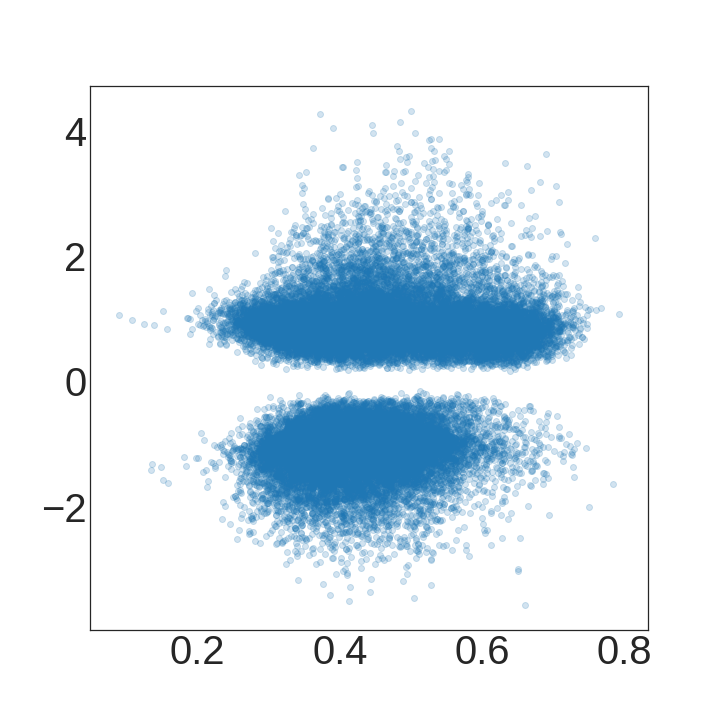

In [18]:
sub = d.sample(40000)
figure(figsize=(10,10))
scatter(sub.gc_frac, sub.log2FoldChange, alpha=0.2)

<IPython.core.display.Javascript object>


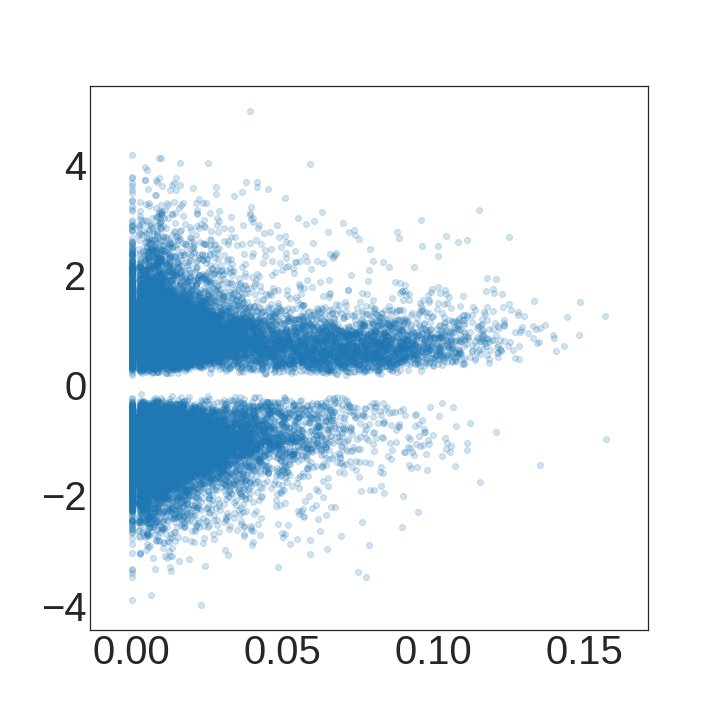

In [19]:
sub = d.sample(40000)
figure(figsize=(10,10))
scatter(sub.cpg_frac, sub.log2FoldChange, alpha=0.2)

<IPython.core.display.Javascript object>


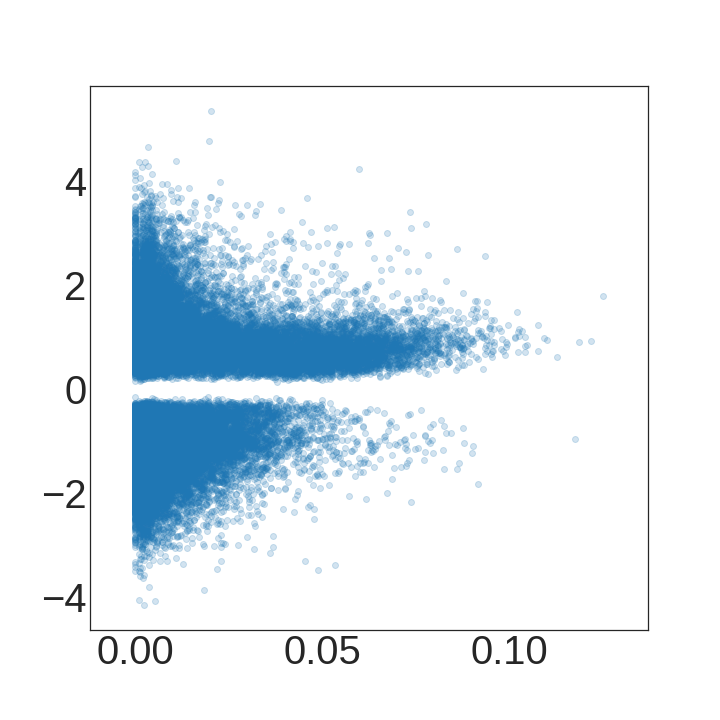

In [45]:
sub = d.sample(100000)
figure(figsize=(10,10))
scatter(sub.cpg_frac * sub.gc_frac, sub.log2FoldChange, alpha=0.2)

<IPython.core.display.Javascript object>


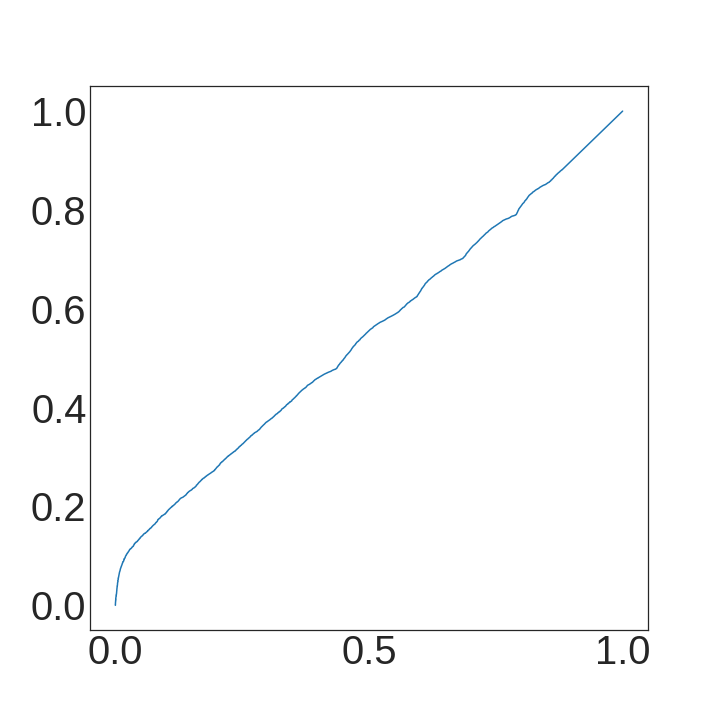

In [20]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(sub.log2FoldChange > 0, sub.cpg_frac)
figure(figsize=(10, 10))
plot(fpr, tpr)


<IPython.core.display.Javascript object>


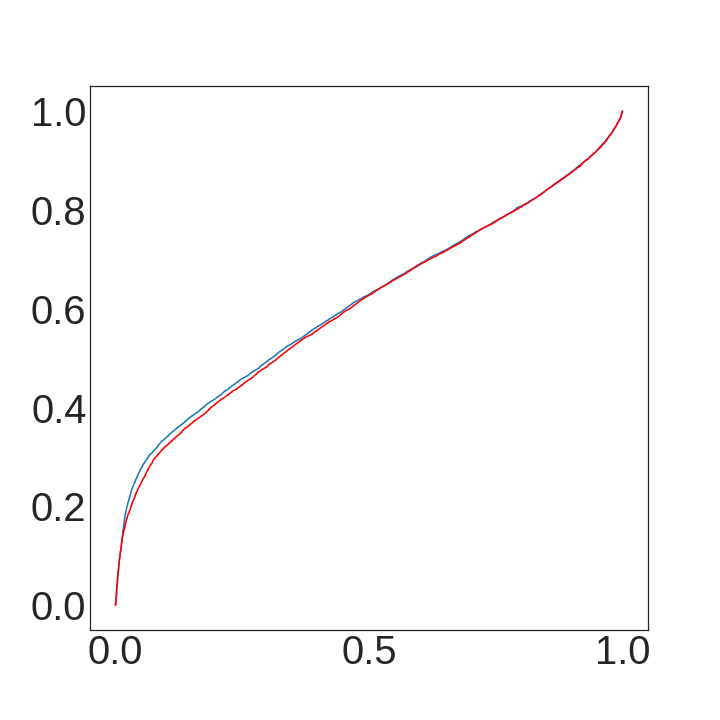

In [25]:
fpr, tpr, thresholds = roc_curve(sub.log2FoldChange > 0, sub.gc_frac)
figure(figsize=(10, 10))
plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(sub.log2FoldChange > 0, sub.gc_frac + sub.cpg_frac)
plot(fpr, tpr, c='r')


/home/thouis/VENV/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<IPython.core.display.Javascript object>


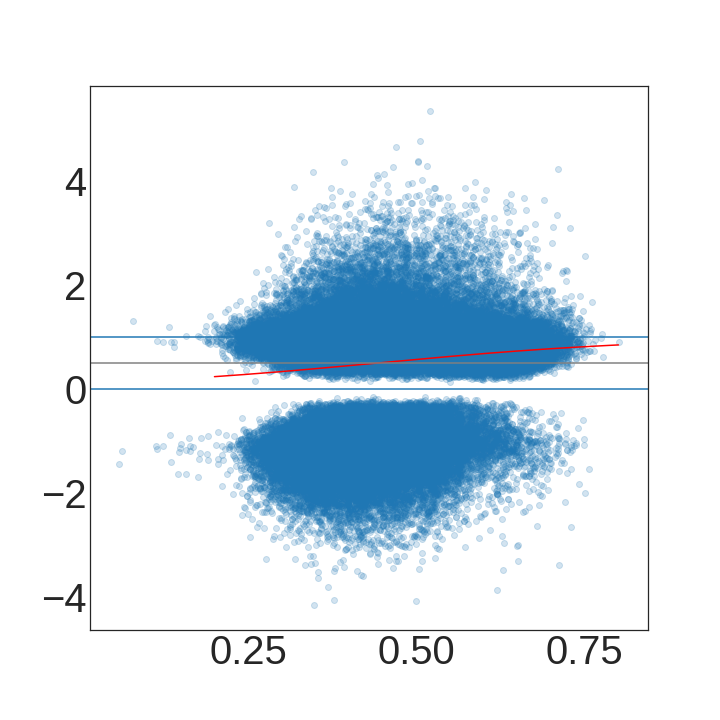

<IPython.core.display.Javascript object>


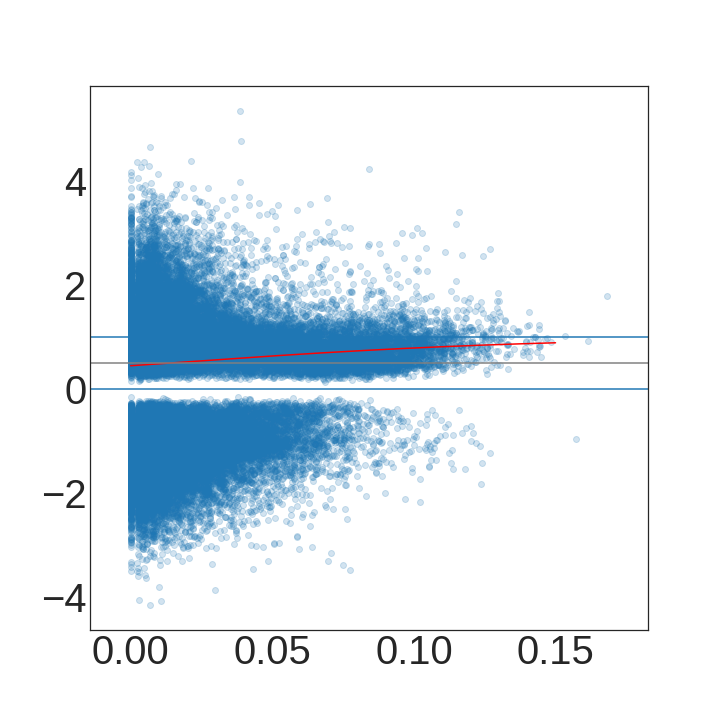

In [46]:
from sklearn.linear_model import LogisticRegression

reg_cpg = LogisticRegression()
reg_cpg.fit(sub.cpg_frac.values.reshape(-1, 1), sub.log2FoldChange.values.reshape(-1, 1) > 0)

reg_gc = LogisticRegression()
reg_gc.fit(sub.gc_frac.values.reshape(-1, 1), sub.log2FoldChange.values.reshape(-1, 1) > 0)

figure(figsize=(10,10))
x_gc = linspace(0.2, 0.8, 500).reshape(-1, 1)
scatter(sub.gc_frac, sub.log2FoldChange, alpha=0.2)
plot(x_gc, reg_gc.predict_proba(x_gc)[:, 1], c='r')
axhline(0)
axhline(1)
axhline(0.5, c='gray')


figure(figsize=(10,10))
x_cpg = linspace(0.0, 0.15, 500).reshape(-1, 1)
scatter(sub.cpg_frac, sub.log2FoldChange, alpha=0.2)
plot(x_cpg, reg_cpg.predict_proba(x_cpg)[:, 1], c='r')
axhline(0)
axhline(1)
axhline(0.5, c='gray')

